<a href="https://colab.research.google.com/github/rpasquini/herramientas-econometricas-2022/blob/main/Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels --upgrade
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd

# Simulando series



Veamos primero el funcionamiento de ```if``` en Python

In [ ]:
# defino una lista
numeros=[1,2,3]

In [ ]:
# for me permite iterar la lista
# Para cada valor en la lista de numeros imprimir el valor al cuadrado 
for x in numeros:
  print(x**2)

1
4
9


In [ ]:
# Una sintaxis alternativa llamada "list comprehension" permite definit una nueva lista
# para ello escribo primero el resultado de lo que quiero en cada elemento de la lista, y luego completo el for
# notar que necesito encerrar toda la instruccion entre corchetes

[x**2 for x in numeros]

[1, 4, 9]

In [ ]:
# Defino lista de realizaciones aleatorias de una funcion normal
randomvar=[20*np.random.normal() for x in range(1, 100)]
# Defino una lista con valores desde el 1 al 100
counter=[x for x in range(1, 100)]
# Idem con los valores multiplicados por 4
tendencia=[4*x for x in range(1, 100)]

# Puedo definir un nuevo dataframe compuesto por listas.
# Para ello defino un diccionario (key:value) con el nombre de la columna  (en el key) y los contenidos (en el value)
df=pd.DataFrame({'counter': counter, 'randomvar':randomvar, 'tendencia':tendencia}) 
df.head()

,counter,randomvar,tendencia
0,1,6.211476,4
1,2,-0.977914,8
2,3,-9.404127,12
3,4,29.417007,16
4,5,31.655259,20


In [ ]:
[x for x in range(1, 11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
df['serie1']=df.tendencia+randomvar
df.head()

,counter,randomvar,tendencia,serie1
0,1,13.814406,4,17.814406
1,2,-14.058992,8,-6.058992
2,3,29.397753,12,41.397753
3,4,34.358019,16,50.358019
4,5,-5.723120,20,14.276880


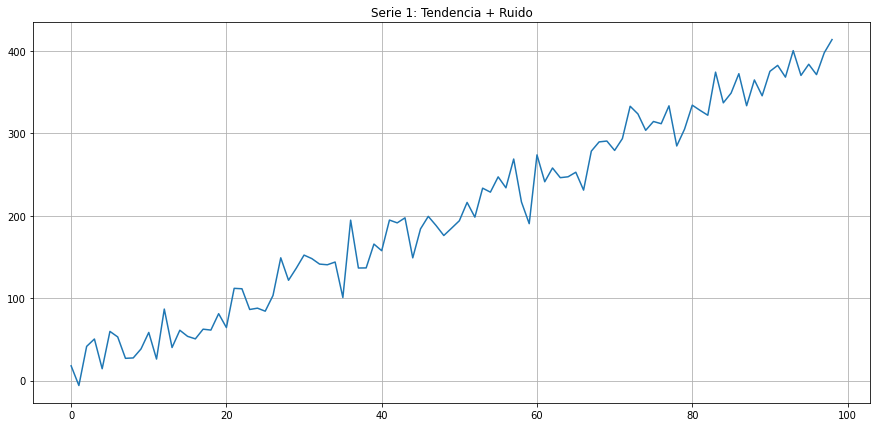

In [ ]:
# Ejemplo grafico con matplotlib
plt.figure(figsize=(15, 7))
plt.plot(df.serie1)
plt.title('Serie 1: Tendencia + Ruido')
plt.grid(True)
plt.show()

In [ ]:
df['shock']=0
df.loc[df.counter==30,'shock']=200
df['serie2']=df.tendencia+df.randomvar+df.shock

In [ ]:
def grafico(serie, titulo):
  """Funcion que grafica una serie
  param serie: serie a graficar
  param titulo: pasar un titulo
  """

  plt.figure(figsize=(15, 7))
  plt.plot(serie)
  plt.title(titulo)
  plt.grid(True)
  plt.show()

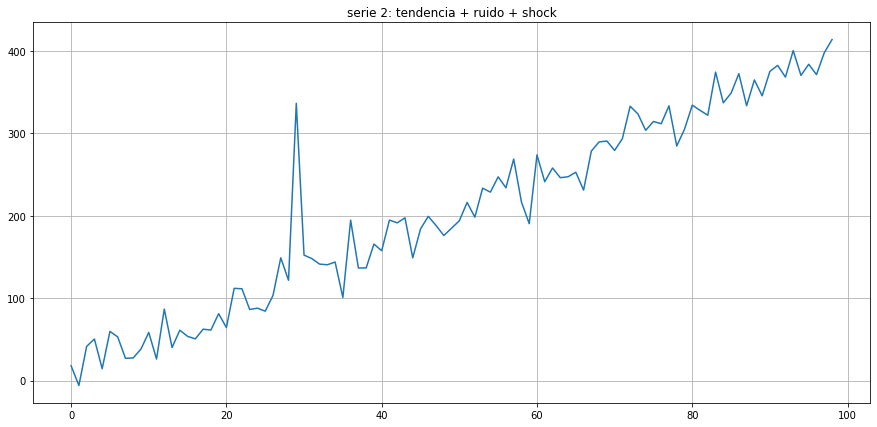

In [ ]:
grafico(df.serie2, 'serie 2: tendencia + ruido + shock')

In [ ]:
df.head()

,counter,randomvar,tendencia,serie1,shock,serie2
0,1,13.814406,4,17.814406,0,17.814406
1,2,-14.058992,8,-6.058992,0,-6.058992
2,3,29.397753,12,41.397753,0,41.397753
3,4,34.358019,16,50.358019,0,50.358019
4,5,-5.723120,20,14.276880,0,14.276880


In [ ]:
# Shock autocorrelacionado
df.loc[0,'shockautocorr']=0
for i in range(1, len(df)):
  df.loc[i, 'shockautocorr'] = df.loc[i-1, 'shockautocorr'] * 0.8  + df.loc[i, 'shock']
df.series3=df.tendencia+df.randomvar+df.shockautocorr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [ ]:
df.head()

,counter,randomvar,tendencia,serie1,shock,serie2,shockautocorr
0,1,13.814406,4,17.814406,0,17.814406,0.0
1,2,-14.058992,8,-6.058992,0,-6.058992,0.0
2,3,29.397753,12,41.397753,0,41.397753,0.0
3,4,34.358019,16,50.358019,0,50.358019,0.0
4,5,-5.723120,20,14.276880,0,14.276880,0.0


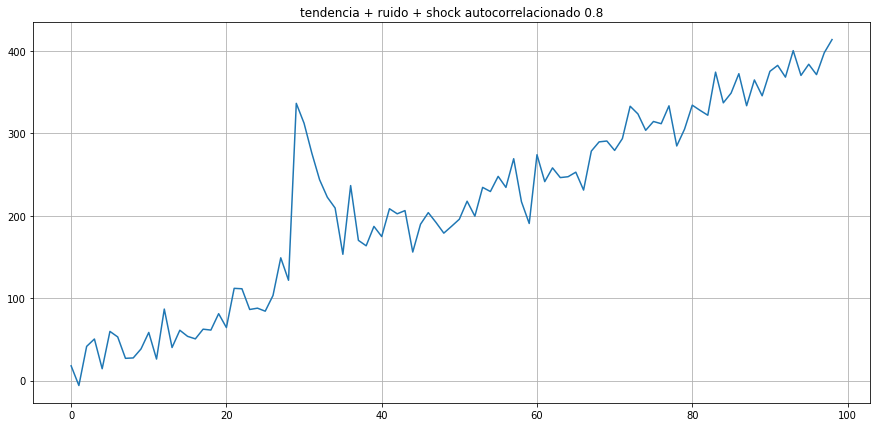

In [ ]:
grafico(df.series3, 'tendencia + ruido + shock autocorrelacionado 0.8')

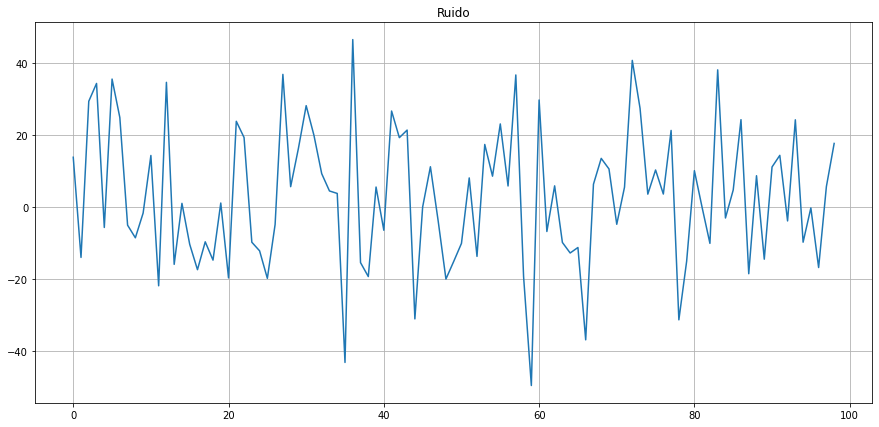

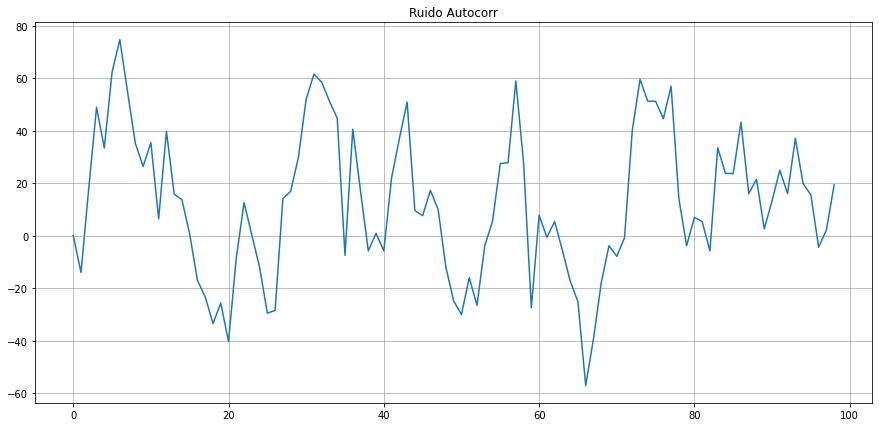

(-10.492338781020365,
 1.1384649472467197e-18,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 <statsmodels.stats.diagnostic.ResultsStore at 0x7f9e409b0bd0>)

In [ ]:
# Ruido vs ruido autocorrelacionado
df.loc[0, 'ruidoautocorr']=0
for i in range(1, len(df)):
  df.loc[i, 'ruidoautocorr'] = df.loc[i-1, 'ruidoautocorr'] * 0.8  + df.loc[i, 'randomvar']
grafico(df.randomvar, 'Ruido')
grafico(df.ruidoautocorr, 'Ruido Autocorr')
sm.tsa.stattools.adfuller(df.randomvar, regresults=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


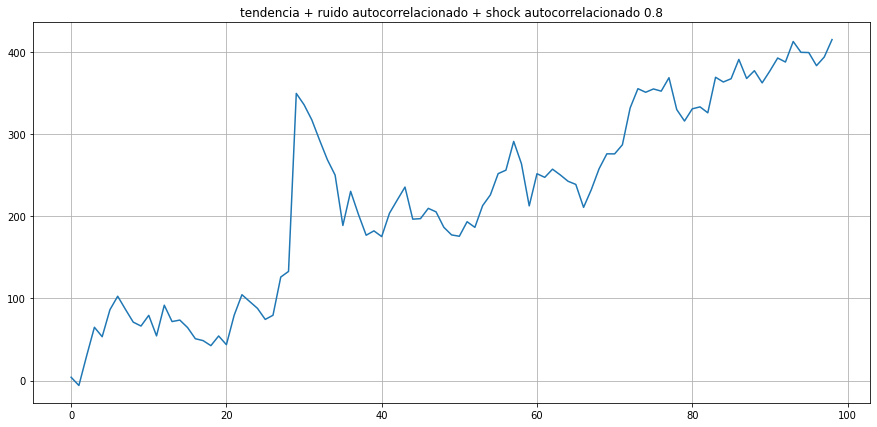

In [ ]:
df.series4=df.tendencia+df.ruidoautocorr+df.shockautocorr
grafico(df.series4, 'tendencia + ruido autocorrelacionado + shock autocorrelacionado 0.8')

# Ajustando Series


In [ ]:
df=pd.read_excel('https://github.com/rpasquini/herramientas-econometricas/blob/main/datos/series_para_R.xlsx?raw=true', sheet_name='emae')

In [ ]:
df.head()

,indice_tiempo,EMAE,EMAERES,EMAETEND
0,1993-01-01,87.389791,-10.032786,99.025500
1,1993-02-01,85.141646,-13.883853,113.900525
2,1993-03-01,101.928041,-11.972484,115.062437
3,1993-04-01,101.890240,-13.172196,120.537692
4,1993-05-01,103.674974,-16.862718,113.193716


In [ ]:
df=df.set_index('indice_tiempo')

In [ ]:
df.head()

,EMAE,EMAERES,EMAETEND
indice_tiempo,,,
1993-01-01,87.389791,-10.032786,99.025500
1993-02-01,85.141646,-13.883853,113.900525
1993-03-01,101.928041,-11.972484,115.062437
1993-04-01,101.890240,-13.172196,120.537692
1993-05-01,103.674974,-16.862718,113.193716


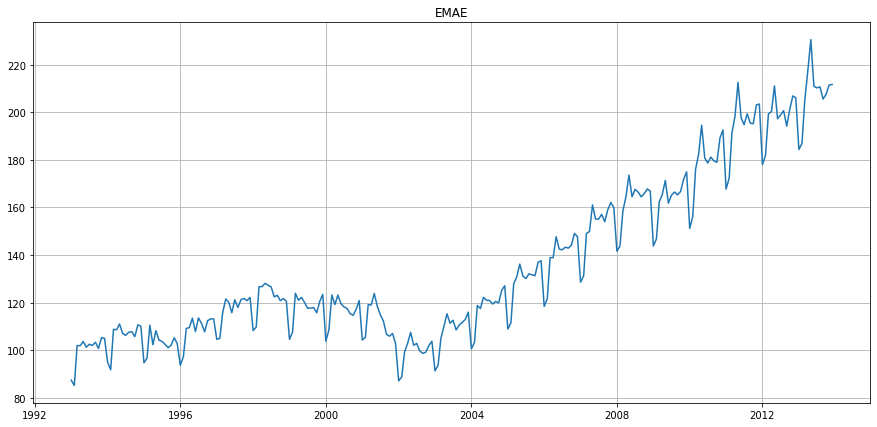

In [ ]:
grafico(df.EMAE,'EMAE')

##  Dickey-Fuller Test

La teoria propone que un proceso tiene que tener todas sus raices >1. La hipotesis nula del DF es que hay una raiz unitaria (=1). Busco rechazarla para concluir que el proceso es estacionario.

Lo siguiente de la documentacion de DF me dice que el pvalue es el segundo resultado. Lo llamo con [1]


From:
https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

Returns:  
adf The test statistic.\
pvalue MacKinnon”s approximate p-value based on MacKinnon (1994, 2010).\
usedlag The number of lags used.\
nobsint The number of observations used for the ADF regression and calculation of the critical values. \
critical values  Critical values for the test statistic at the 1 %, 5 %, and 10 % levels. Based on MacKinnon (2010). \
icbest The maximized information criterion if autolag is not None.\


In [ ]:
# Como devuelve varios estadisticos, con 1 nos eferimos al segundo, esto es, el p-value.
sm.tsa.stattools.adfuller(df.EMAE)[1]


0.981988855855342

## Voy a modelar una tendencia y estacionalidad mensual, para intentar llevar la serie a un proceso estacionario 

Propongo primero

$$EMAE_t=\beta_0+\beta_1 t +\beta_1 t^2+ \sum_{m=1}^{11}dmes_m+\epsilon_t $$

In [ ]:
df.head()

,EMAE,EMAERES,EMAETEND
indice_tiempo,,,
1993-01-01,87.389791,-10.032786,99.025500
1993-02-01,85.141646,-13.883853,113.900525
1993-03-01,101.928041,-11.972484,115.062437
1993-04-01,101.890240,-13.172196,120.537692
1993-05-01,103.674974,-16.862718,113.193716


In [ ]:
df['t']=df.reset_index().index
df['t2']=df['t']**2
df['month']=df.index.month
df.head()

,EMAE,EMAERES,EMAETEND,t,t2,month
indice_tiempo,,,,,,
1993-01-01,87.389791,-10.032786,99.025500,0,0,1
1993-02-01,85.141646,-13.883853,113.900525,1,1,2
1993-03-01,101.928041,-11.972484,115.062437,2,4,3
1993-04-01,101.890240,-13.172196,120.537692,3,9,4
1993-05-01,103.674974,-16.862718,113.193716,4,16,5


Utilizo sintaxis de R para facilitar la creacion automatizada de dummies en base a una variable categórica

In [ ]:
pd.get_dummies(df.month)

,1,2,3,4,5,6,7,8,9,10,11,12
indice_tiempo,,,,,,,,,,,,
1993-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1993-02-01,0,1,0,0,0,0,0,0,0,0,0,0
1993-03-01,0,0,1,0,0,0,0,0,0,0,0,0
1993-04-01,0,0,0,1,0,0,0,0,0,0,0,0
1993-05-01,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-01,0,0,0,0,0,0,0,1,0,0,0,0
2013-09-01,0,0,0,0,0,0,0,0,1,0,0,0
2013-10-01,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
pd.concat([df,pd.get_dummies(df.month)], axis=1)

,EMAE,EMAERES,EMAETEND,t,t2,month,1,2,3,4,5,6,7,8,9,10,11,12
indice_tiempo,,,,,,,,,,,,,,,,,,
1993-01-01,87.389791,-10.032786,99.025500,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1993-02-01,85.141646,-13.883853,113.900525,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0
1993-03-01,101.928041,-11.972484,115.062437,2,4,3,0,0,1,0,0,0,0,0,0,0,0,0
1993-04-01,101.890240,-13.172196,120.537692,3,9,4,0,0,0,1,0,0,0,0,0,0,0,0
1993-05-01,103.674974,-16.862718,113.193716,4,16,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-01,210.700000,-3.499814,213.490840,247,61009,8,0,0,0,0,0,0,0,1,0,0,0,0
2013-09-01,205.600000,-7.890840,214.769050,248,61504,9,0,0,0,0,0,0,0,0,1,0,0,0
2013-10-01,207.600000,-7.169050,219.256954,249,62001,10,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
model=smf.ols(formula='EMAE~ t+ t2 + C(month)',data=df)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   EMAE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     276.7
Date:                Sat, 15 Oct 2022   Prob (F-statistic):          1.64e-135
Time:                        15:42:08   Log-Likelihood:                -903.27
No. Observations:                 252   AIC:                             1835.
Df Residuals:                     238   BIC:                             1884.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         97.4515      2.502     38.

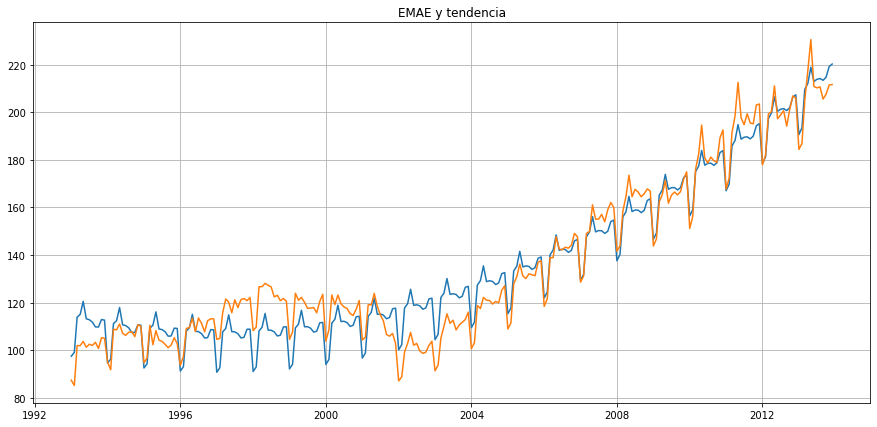

In [ ]:
df['tendencia']=results.predict()
plt.figure(figsize=(15, 7))
plt.plot(df.tendencia)
plt.plot(df.EMAE)
plt.title('EMAE y tendencia')
plt.grid(True)
plt.show()

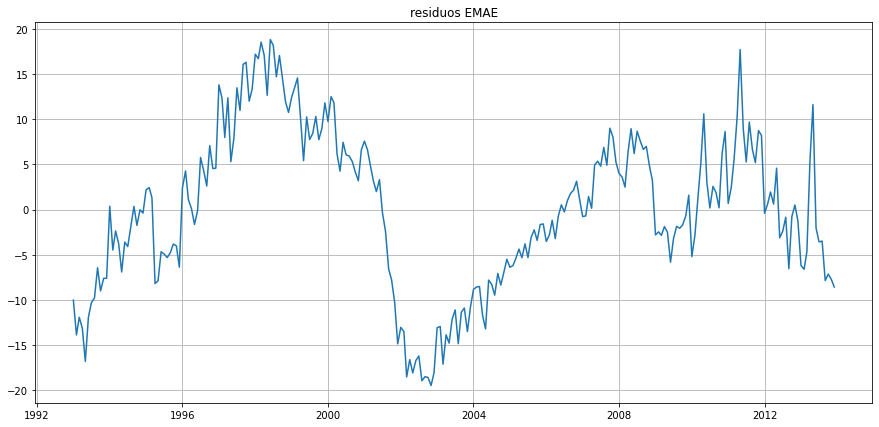

In [ ]:
grafico(results.resid,'residuos EMAE')


Veamos el DF

In [ ]:
sm.tsa.stattools.adfuller(results.resid)[1]

0.19957306298569572

In [ ]:
df['EMAEresid']=results.resid

In [ ]:
# AR(1)
mod = AutoReg(df.EMAEresid, 1, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              EMAEresid   No. Observations:                  252
Model:                     AutoReg(1)   Log Likelihood                -648.780
Method:               Conditional MLE   S.D. of innovations              3.209
Date:                Sat, 15 Oct 2022   AIC                           1303.561
Time:                        15:42:27   BIC                           1314.137
Sample:                    02-01-1993   HQIC                          1307.817
                         - 12-01-2013                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0082      0.203      0.041      0.968      -0.389       0.405
EMAEresid.L1     0.9291      0.023     39.998      0.000       0.884       0.975
                                    Roots   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
mod = AutoReg(df.EMAEresid, 2, old_names=False)
res = mod.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:              EMAEresid   No. Observations:                  252
Model:                     AutoReg(2)   Log Likelihood                -643.629
Method:               Conditional MLE   S.D. of innovations              3.176
Date:                Sat, 15 Oct 2022   AIC                           1295.258
Time:                        15:42:34   BIC                           1309.344
Sample:                    03-01-1993   HQIC                          1300.927
                         - 12-01-2013                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0272      0.201      0.136      0.892      -0.366       0.421
EMAEresid.L1     0.8088      0.062     12.941      0.000       0.686       0.931
EMAEresid.L2     0.1266      0.062      2.02

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
sm.tsa.stattools.adfuller(res.resid)[1]
# ya podemos rechazar el unit root (i.e. es estacionaria)

0.04847950124779338

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


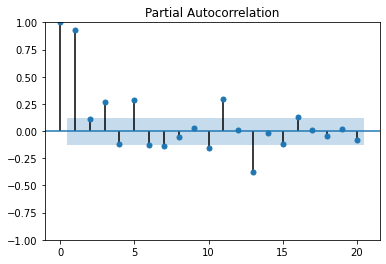

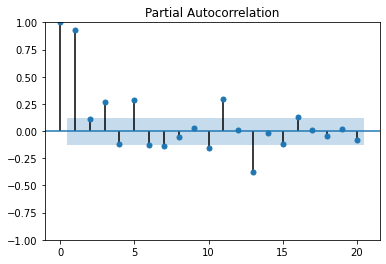

In [ ]:
#smt.graphics.plot_acf(df.EMAEresid, lags=20)
smt.graphics.plot_pacf(df.EMAEresid, lags=20)

In [ ]:
sel = ar_select_order(df.EMAE,maxlag=2, trend='ct',seasonal=True)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                   EMAE   No. Observations:                  252
Model:               Seas. AutoReg(2)   Log Likelihood                -646.133
Method:               Conditional MLE   S.D. of innovations              3.208
Date:                Fri, 14 Oct 2022   AIC                           1324.266
Time:                        23:29:05   BIC                           1380.609
Sample:                    03-01-1993   HQIC                          1346.942
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.3622      1.366    -11.976      0.000     -19.040     -13.684
trend          0.0109      0.006      1.774      0.076      -0.001       0.023
s(2,12)       16.8375      1.501     11.215      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:435: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


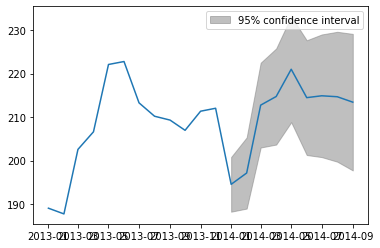

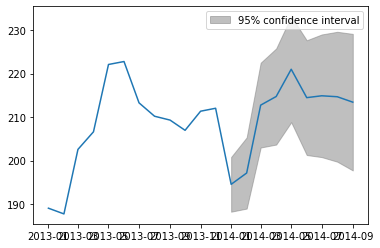

In [ ]:
res.plot_predict(240,260)

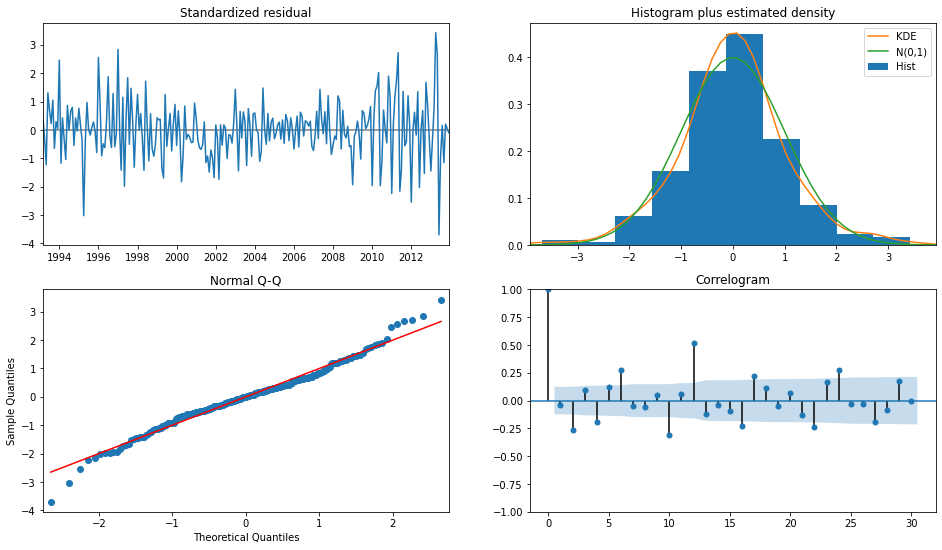

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [ ]:
sm.tsa.stattools.adfuller((df.EMAE-df.EMAE.shift(1)).dropna(), regresults=True)

(-3.340587112564505,
 0.013158882464738248,
 {'1%': -3.4586084859607156,
  '5%': -2.873972159235721,
  '10%': -2.57339565928848},
 <statsmodels.stats.diagnostic.ResultsStore at 0x7f9e3afc3950>)